Sumber : https://www.kaggle.com/rubinakarki987/kernel61c7c90f67

### Import Datasets

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadnaufal","key":"4b724b73e81ef42a13b1261e37da064c"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Nov 25 06:03 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#donwload dataset kernel nya
#caranya klik titik tiga di kaggle, lalu klik copy API command
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset --unzip
# --unzip adalah setelah download langsung aja di unzip

 87% 105M/121M [00:02<00:00, 44.3MB/s] 
100% 121M/121M [00:02<00:00, 44.7MB/s]


### Import Library

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [24]:
import os
print(os.listdir("/content/images/images/train"))

['sad', 'neutral', 'surprise', 'disgust', 'fear', 'happy', 'angry']


In [0]:
# displaying some images for different expression
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import os

In [0]:
# size of the image: 48*48 pixels
pic_size = 48
    
base_path = "/content/images/images/"

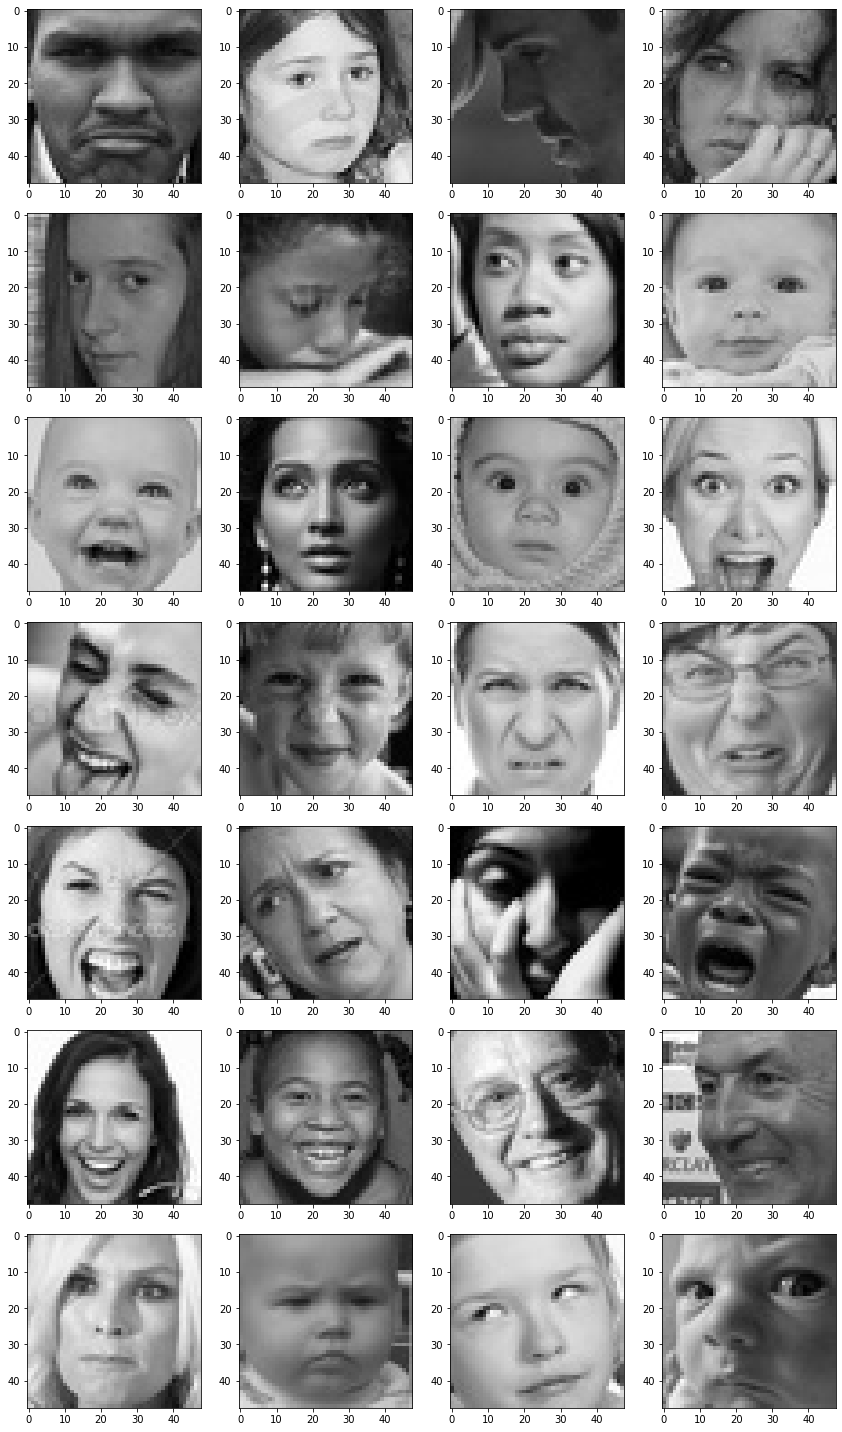

In [27]:
plt.figure(0, figsize = (12,20))
cpt =0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,5):
        cpt = cpt + 1
        plt.subplot(7,4,cpt)
        img = load_img(base_path + "train/" + expression + '/' +
                      os.listdir(base_path +"train/" + expression)[i],
        target_size =(pic_size, pic_size))
        plt.imshow(img,cmap = "gray")
plt.tight_layout()
plt.show()

In [28]:
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path+"train/"+expression)))+" "+expression +" " + "images")

4938 sad images
4982 neutral images
3205 surprise images
436 disgust images
4103 fear images
7164 happy images
3993 angry images


In [29]:
from keras.preprocessing.image import ImageDataGenerator

#  number of training examples utilized in one training
batch_size = 128

training_datagen = ImageDataGenerator()
validation_datagen = ImageDataGenerator()

train_generator = training_datagen.flow_from_directory(base_path + 'train',
                                                       target_size =(pic_size,pic_size),
                                                       color_mode ='grayscale',
                                                       batch_size = batch_size,
                                                       class_mode ='categorical',
                                                       shuffle = True)

validation_generator = validation_datagen.flow_from_directory(base_path + 'validation',
                                                       target_size = (pic_size,pic_size),
                                                       color_mode = 'grayscale',
                                                       batch_size = batch_size,
                                                       class_mode ='categorical',
                                                       shuffle = True)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [0]:
from keras.layers import Dense, Input, Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam 

# no of possible label values
nb_classes = 7

#initialising the CNN
model = Sequential()

#1-Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
%%time

# number of epochs to train the NN
epochs = 5 #aslinya epoch 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/5
225/225 [==============================] - 1286s 6s/step - loss: 2.0296 - acc: 0.2375 - val_loss: 1.7519 - val_acc: 0.2857

Epoch 00001: val_acc improved from -inf to 0.28565, saving model to model_weights.h5
Epoch 2/5
225/225 [==============================] - 1281s 6s/step - loss: 1.8406 - acc: 0.2913 - val_loss: 1.6875 - val_acc: 0.3394

Epoch 00002: val_acc improved from 0.28565 to 0.33943, saving model to model_weights.h5
Epoch 3/5
225/225 [==============================] - 1293s 6s/step - loss: 1.7299 - acc: 0.3367 - val_loss: 1.6066 - val_acc: 0.3825

Epoch 00003: val_acc improved from 0.33943 to 0.38253, saving model to model_weights.h5
Epoch 4/5
225/225 [==============================] - 1282s 6s/step - loss: 1.6578 - acc: 0.3624 - val_loss: 1.5646 - val_acc: 0.4033

Epoch 00004: val_acc improved from 0.38253 to 0.40329, saving model to model_weights.h5
Epoch 5/5
225/225 [==============================] - 1283s 6s/step - loss: 1.5959 - acc: 0.3880 - val_loss: 1.5685 

In [0]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [33]:
# serialize weights to HDF5
model.save("weights.h5")
print("Saved model to disk")

Saved model to disk


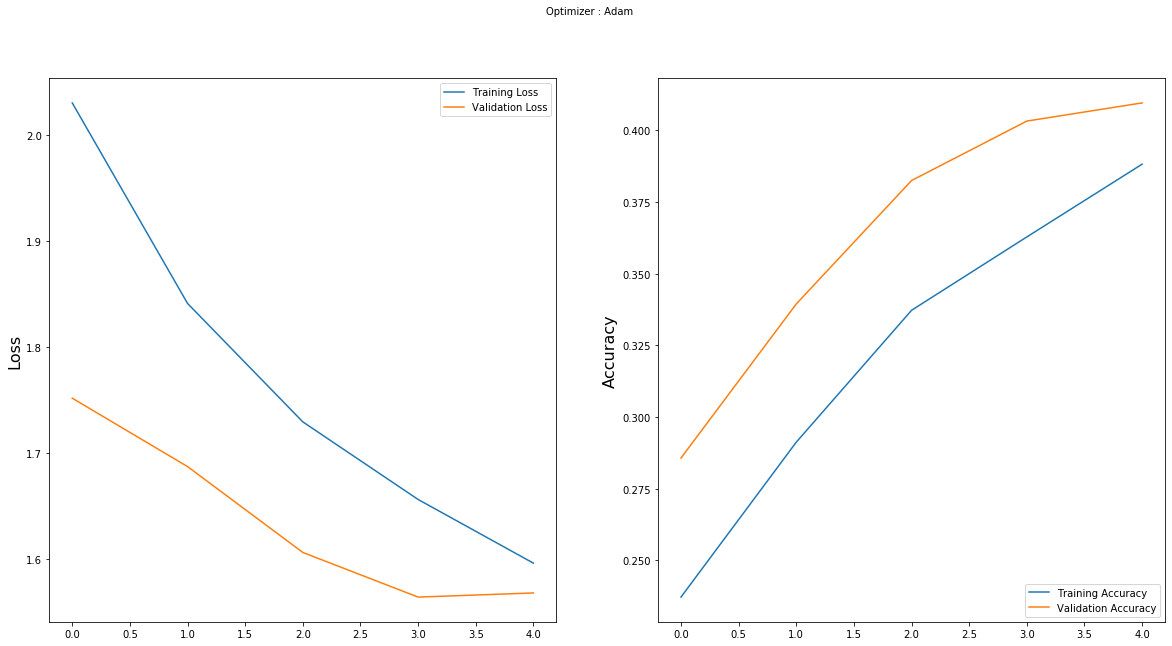

In [34]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()